Average Cooperation Rates:
              scenario_name  round  avg_coop_rate
0  FullyConnected_QLearning      0           0.45
1  FullyConnected_QLearning      1           0.45
2  FullyConnected_QLearning      2           0.20
3  FullyConnected_QLearning      3           0.10
4  FullyConnected_QLearning      4           0.20


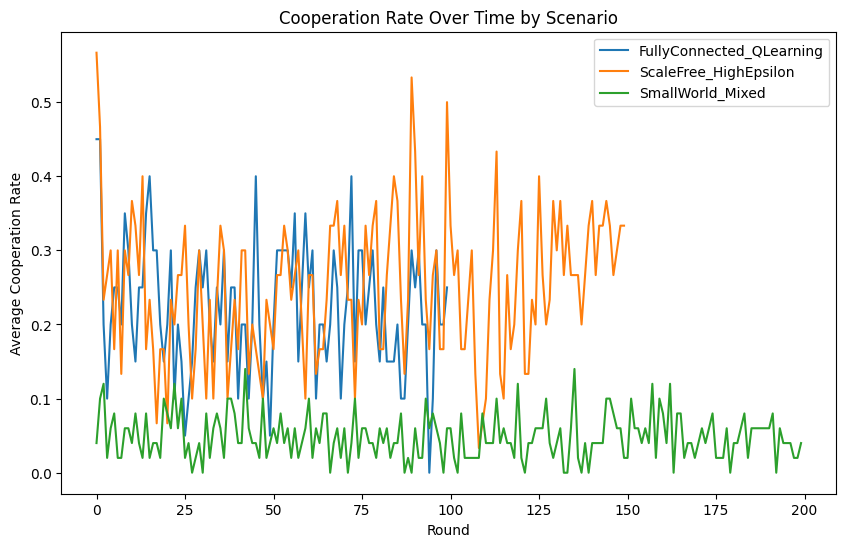

In [3]:
# analysis.ipynb cell

import pandas as pd
import matplotlib.pyplot as plt
import glob

# Load all rounds CSV files from the results folder.
round_files = glob.glob("results/experiment_results_*_rounds.csv")
df_list = [pd.read_csv(f) for f in round_files]
df_rounds = pd.concat(df_list, ignore_index=True)

# Calculate the average cooperation rate per round for each scenario.
# The 'move' column contains strings "cooperate" and "defect".
avg_coop_rate = df_rounds.groupby(["scenario_name", "round"])["move"] \
    .apply(lambda x: (x == "cooperate").mean()) \
    .reset_index(name="avg_coop_rate")

print("Average Cooperation Rates:")
print(avg_coop_rate.head())

# Plot average cooperation rate over time for each scenario.
scenarios = avg_coop_rate["scenario_name"].unique()
plt.figure(figsize=(10, 6))
for scenario in scenarios:
    df_scenario = avg_coop_rate[avg_coop_rate["scenario_name"] == scenario]
    plt.plot(df_scenario["round"], df_scenario["avg_coop_rate"], label=scenario)

plt.xlabel("Round")
plt.ylabel("Average Cooperation Rate")
plt.title("Cooperation Rate Over Time by Scenario")
plt.legend()
plt.show()

# If you logged additional Q-values in your rounds CSV, you could analyze them similarly.
# For example, if your rounds CSV had columns "q_cooperate" and "q_defect" for q_learning agents,
# you might do the following:
#
# q_values = df_rounds[df_rounds["q_cooperate"].notnull()]
# mean_q_values = q_values.groupby("round")[["q_cooperate", "q_defect"]].mean().reset_index()
#
# plt.figure(figsize=(10, 6))
# plt.plot(mean_q_values["round"], mean_q_values["q_cooperate"], label="q_cooperate")
# plt.plot(mean_q_values["round"], mean_q_values["q_defect"], label="q_defect")
# plt.xlabel("Round")
# plt.ylabel("Mean Q Values")
# plt.title("Evolution of Q Values for Q-Learning Agents")
# plt.legend()
# plt.show()
